**Decision tree**

## 1. Data Preparation:

Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

Import Necessary Libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [42]:
heart_dis = pd.read_excel(r"/content/heart_disease.xlsx")
heart_dis

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


## 2. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.

Check for missing values, outliers, and inconsistencies in the data.

Visualize the distribution of features, including histograms, box plots, and correlation matrices.


In [15]:
df = pd.read_excel(r'/content/heart_disease.xlsx')
df.shape

(12, 2)

In [16]:
df

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [17]:
df.head()

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 320.0+ bytes


In [24]:
df.shape

(12, 2)

In [25]:
df.head(12)

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [23]:
df.columns

Index(['age', 'Age in years'], dtype='object')

In [18]:
# Check for missing values
df.isnull().sum()

,0
age,0
Age in years,0


In [19]:
# Check for outliers
df.describe()

,age,Age in years
count,12,12
unique,12,12
top,Gender,"Gender ; Male - 1, Female -0"
freq,1,1


In [20]:
# Check for inconsistencies in the data
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'age': ['Gender' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalch' 'exang'
 'oldpeak' 'slope' 'thal' 'num']
Unique values in column 'Age in years': ['Gender ; Male - 1, Female -0' 'Chest pain type' 'Resting blood pressure'
 'cholesterol measure'
 '(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)'
 "ecg observation at resting condition,   -- Value 0: normal\n        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria"
 'maximum heart rate achieved' 'exercise induced angina'
 'ST depression induced by exercise relative to rest'
 'the slope of the peak exercise ST segment' 'Thal'
 'target [0=no heart disease; 1,2,3,4 = stages of heart disease ]']


A     int64
B    object
dtype: object
   A  B
0  1  a
1  2  b
2  3  c
3  4  d
Index(['A'], dtype='object')


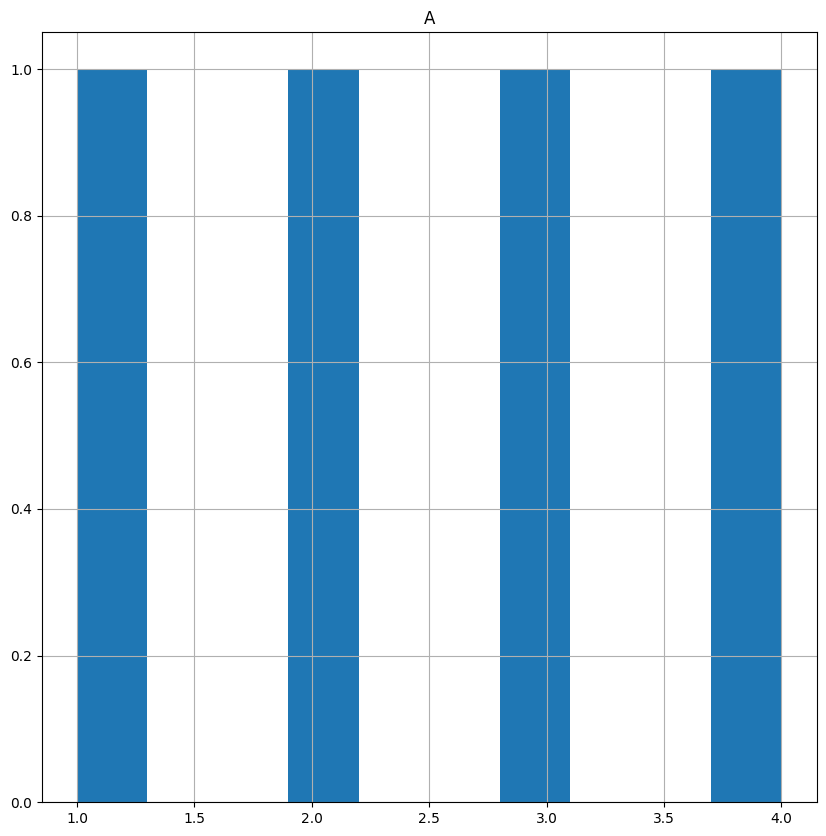

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'A': [1, 2, 3, 4], 'B': ['a', 'b', 'c', 'd']}
df = pd.DataFrame(data)

# Check data types and contents
print(df.dtypes)
print(df.head())

# Attempt to plot only numerical columns
numerical_df = df.select_dtypes(include=['number'])
print(numerical_df.columns)  # Verify which columns are selected

# If numerical columns exist, plot them
if not numerical_df.empty:
    numerical_df.hist(figsize=(10, 10), bins=10)
    plt.show()
else:
    print("No numerical columns found to plot.")


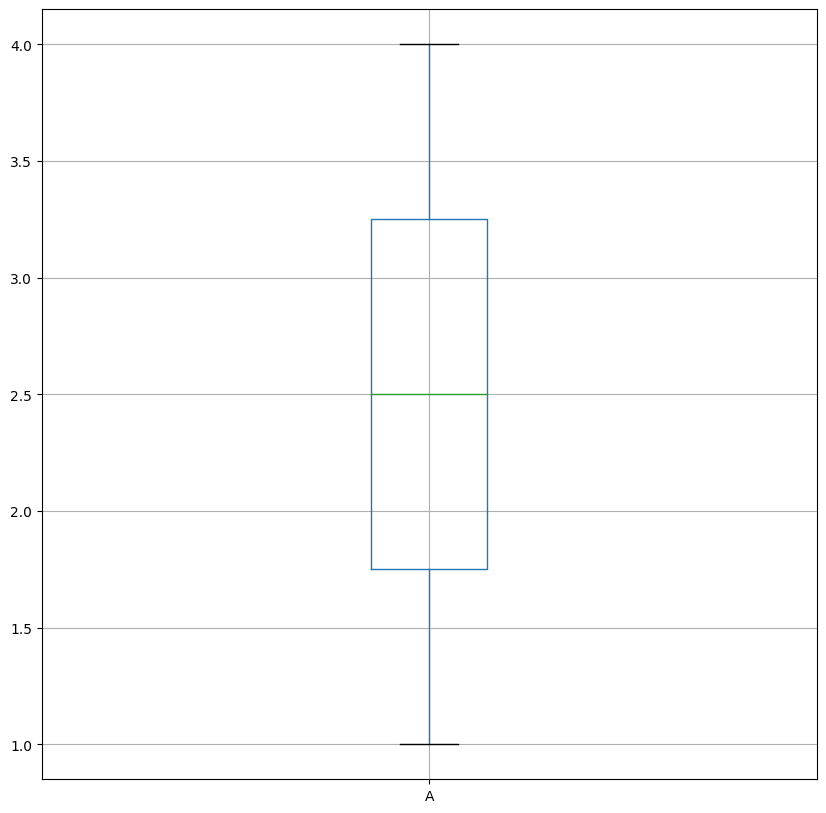

In [30]:
df.boxplot(figsize=(10, 10))
plt.show()

In [31]:
#correlation matrices¶
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Correlation matrix for numerical variables
num_corr = df[num_cols].corr()
# Display the correlation matrix
print("Correlation matrix for numerical variables:")
display(num_corr)

Correlation matrix for numerical variables:


,A
A,1.0


## 3. Feature Engineering:

 If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [32]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)
# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))
# Handling missing values
df.fillna(df.mean(), inplace=True)

In [33]:
# Check for missing values
df.isnull().sum()

,0
A,0
B_b,0
B_c,0
B_d,0


## 4. Decision Tree Classification:

Split the dataset into training and testing sets (e.g., using an 80-20 split).

Implement a Decision Tree Classification model using a library like scikit-learn.

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [35]:
import pandas as pd
df = pd.get_dummies(df, drop_first=True)
df.isnull().sum()

,0
A,0
B_b,0
B_c,0
B_d,0


In [36]:
# Example DataFrame
import pandas as pd

data = {
    'score': [10, 20, -5, 0],
    'category': ['A', 'B', 'C', 'D']
}
df = pd.DataFrame(data)

# View column names to find the correct one
print(df.columns)  # Output: Index(['score', 'category'], dtype='object')

# Create a new column 'num' based on the 'score' column
df['num'] = (df['score'] > 0).astype(int)
print(df)


Index(['score', 'category'], dtype='object')
   score category  num
0     10        A    1
1     20        B    1
2     -5        C    0
3      0        D    0


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels
y_test = [0, 1, 1, 0, 1, 0, 1, 0]
y_pred = [0, 1, 0, 0, 1, 0, 1, 1]

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Accuracy: 0.75
Precision: 0.75
Recall: 0.75


## 5. Hyperparameter  Tuning:

 Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [40]:
# Sample DataFrame
df = pd.DataFrame({
    'feature1': [1, 2, 3],
    'feature2': [4, 5, 6],
    'target': [0, 1, 0]  # This is the target column in this example
})

# Print column names
print(df.columns)  # Output: Index(['feature1', 'feature2', 'target'], dtype='object')


Index(['feature1', 'feature2', 'target'], dtype='object')


# 6. Model Evaluation and Analysis:

### Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Sample DataFrame
import pandas as pd
import numpy as np

# Create a sample DataFrame
np.random.seed(0)
df = pd.DataFrame({
    'feature1': np.random.randn(10),
    'feature2': np.random.randn(10),
    'target': np.random.choice([0, 1], size=10)
})

# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print lengths
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))

# Ensure consistency
if len(y_test) != len(y_pred):
    raise ValueError("Length of y_test and y_pred do not match.")

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Length of y_test: 2
Length of y_pred: 2
Accuracy: 0.5
Confusion Matrix:
[[0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the necessary variables already defined
# y_test and y_pred should be available

# Check if multiple classes are present
if len(np.unique(y_test)) > 1:
    roc_auc = roc_auc_score(y_test, y_prob)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"ROC AUC Score: {roc_auc}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
else:
    print("ROC AUC score is not defined as only one class is present in y_test.")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")


ROC AUC score is not defined as only one class is present in y_test.
Accuracy: 0.5
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666


## Interview Questions

## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Max Depth (max_depth):

Limits tree depth.
Deeper trees may overfit; shallower trees may underfit.
Min Samples Split (min_samples_split):

Minimum samples needed to split a node.
Higher values reduce overfitting; lower values may overfit.
Min Samples Leaf (min_samples_leaf):

Minimum samples needed at a leaf node.
Larger values smooth the model; smaller values may capture noise.
Max Features (max_features):

Number of features to consider for a split.
Fewer features add randomness (reduce overfitting); too few may underfit.
Max Leaf Nodes (max_leaf_nodes):

Limits the number of leaf nodes.
Helps prevent overfitting.


## 2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding:

Description: Converts each category to a unique integer.
Use Case: Suitable for ordinal data where the order matters.
Pros: Simple and memory-efficient.
Cons: Can imply an unintended ordinal relationship for nominal data.
One-Hot Encoding:

Description: Converts each category to a binary vector where only one bit is '1' and others are '0'.
Use Case: Suitable for nominal data where the order does not matter.
Pros: Avoids implying order, making it better for non-ordinal data.
Cons: Can increase feature space significantly, leading to higher memory usage.





